<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
    5.1. [Train-test split](#train_test_split)<br>
    5.2. [Fit a model to the data](#fit_model)<br>
    5.3. [Model evaluation](#model_evaluation)<br>
    5.4. [Fix problems](#fix_problems)
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree Regressor](#decision_tree)<br>
    7.2. [Random Forest Regressor](#random_forest) -
      [Overfit](#overfit) - 
      [Underfit](#underfit)<br>
    7.3. [Gradient Boosting Regressor](#gradient_boosting)<br>
    7.4. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>
    8.1. [Finding best parameters](#find_best_parameters)<br>
    

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [2]:
taxi_data = pd.read_parquet('Data/yellow_tripdata_2019-10.parquet') 
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-10-01 00:19:55,2019-10-01 00:23:57,1.0,0.4,1.0,N,48,163,2,4.5,3.0,0.5,0.0,0.0,0.3,8.3,2.5,None
1,1,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.3,1.0,N,144,141,1,14.5,3.0,0.5,2.0,0.0,0.3,20.3,2.5,None
2,1,2019-10-01 00:06:52,2019-10-01 00:21:23,1.0,5.0,1.0,N,137,80,1,17.0,3.0,0.5,5.2,0.0,0.3,26.0,2.5,None
3,2,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.0,1.0,N,25,25,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.0,None
4,2,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.0,1.0,N,25,25,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0,None


In [3]:
taxi_data.shape

(7213891, 19)

# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [4]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213891 entries, 0 to 7213890
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [6]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'PULocationID', 'total_amount']]

In [7]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213891 entries, 0 to 7213890
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   total_amount           float64       
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 330.2 MB


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>],
       [<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

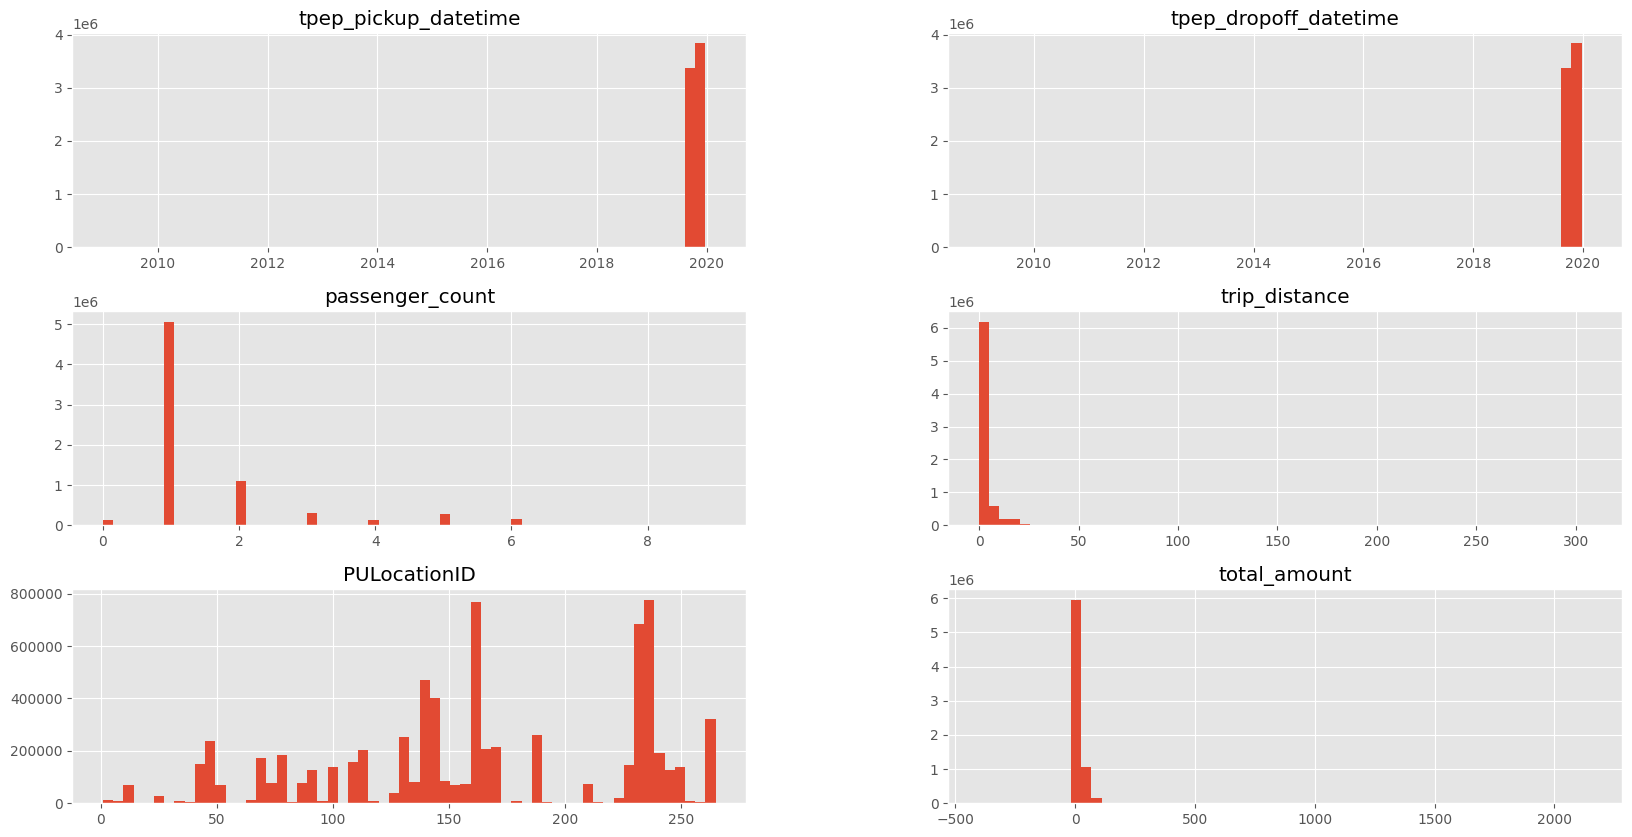

In [8]:
plt.style.use('ggplot')
taxi_data.hist(figsize=(20,10),bins=60)

In [9]:
taxi_data.isnull().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          46723
trip_distance                0
PULocationID                 0
total_amount                 0
dtype: int64

In [10]:
taxi_data['trip_distance'].value_counts()

trip_distance
0.90     133123
0.80     132249
1.00     131620
1.10     126102
0.70     125612
          ...  
54.87         1
52.82         1
37.02         1
54.04         1
35.01         1
Name: count, Length: 4555, dtype: int64

In [11]:
taxi_data['total_amount'].value_counts()

total_amount
 10.30     127810
 10.80     127079
 9.80      125924
 11.30     124357
 9.30      122168
            ...  
 118.20         1
 194.87         1
 90.78          1
 122.53         1
-68.10          1
Name: count, Length: 12652, dtype: int64

In [12]:
taxi_data['passenger_count'].value_counts()

passenger_count
1.0    5063866
2.0    1096061
3.0     296540
5.0     272184
6.0     159337
4.0     141524
0.0     137577
7.0         38
8.0         25
9.0         16
Name: count, dtype: int64

In [13]:
taxi_data[taxi_data['passenger_count'].isnull()]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,total_amount
7167168,2019-10-01 00:37:51,2019-10-01 00:49:23,NaN,2.82,91,22.00
7167169,2019-10-01 00:52:00,2019-10-01 01:05:00,NaN,6.29,216,21.63
7167170,2019-10-01 00:34:26,2019-10-01 01:07:09,NaN,16.92,68,58.08
7167171,2019-10-01 00:59:00,2019-10-01 01:21:00,NaN,11.94,137,54.60
7167172,2019-10-01 00:17:00,2019-10-01 00:40:00,NaN,14.87,137,56.21
...,...,...,...,...,...,...
7213886,2019-10-31 23:20:00,2019-10-31 23:56:00,NaN,19.53,77,73.50
7213887,2019-10-31 23:42:00,2019-11-01 00:07:00,NaN,4.96,238,32.50
7213888,2019-10-31 23:50:35,2019-11-01 00:08:45,NaN,4.63,186,32.31
7213889,2019-10-31 23:29:26,2019-10-31 23:59:15,NaN,17.49,45,63.42


<Axes: xlabel='index', ylabel='total_amount'>

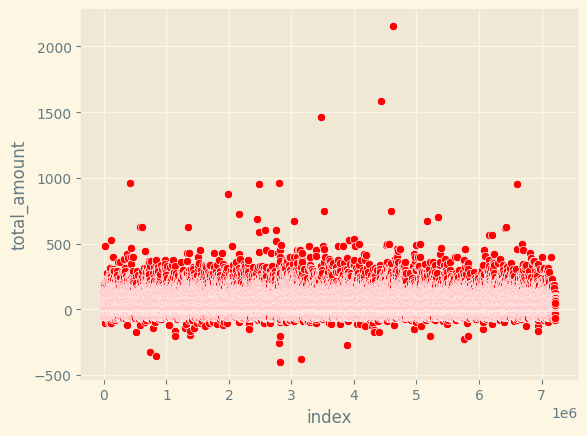

In [14]:
plt.style.use('Solarize_Light2')
df = taxi_data.reset_index()
sns.scatterplot(data=df, y='total_amount', x='index', color='red')

In [15]:
taxi_data[(taxi_data['total_amount'] > 200) | (taxi_data['total_amount'] < 0)] 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,total_amount
3,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.00,25,-3.80
528,2019-10-01 00:37:27,2019-10-01 00:37:48,1.0,0.10,263,-6.30
713,2019-10-01 00:30:01,2019-10-01 00:33:48,1.0,0.80,162,-8.80
923,2019-10-01 00:09:20,2019-10-01 00:11:18,4.0,0.78,140,-7.80
1088,2019-10-01 00:11:46,2019-10-01 00:14:22,1.0,0.34,211,-7.30
...,...,...,...,...,...,...
7213294,2019-10-31 15:03:00,2019-10-31 15:57:00,NaN,9.46,88,-48.06
7213297,2019-10-31 15:18:00,2019-10-31 15:18:00,NaN,0.00,43,-33.22
7213613,2019-10-31 18:14:00,2019-10-31 18:35:00,NaN,3.11,75,-27.37
7213824,2019-10-31 21:03:10,2019-10-31 21:03:00,NaN,0.00,164,-34.15


In [16]:
taxi_data[(taxi_data['total_amount'] < 200) & (taxi_data['total_amount'] > 0)] 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,total_amount
0,2019-10-01 00:19:55,2019-10-01 00:23:57,1.0,0.40,48,8.30
1,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.30,144,20.30
2,2019-10-01 00:06:52,2019-10-01 00:21:23,1.0,5.00,137,26.00
4,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.00,25,3.80
5,2019-10-01 00:20:15,2019-10-01 00:20:29,1.0,0.00,193,3.80
...,...,...,...,...,...,...
7213886,2019-10-31 23:20:00,2019-10-31 23:56:00,NaN,19.53,77,73.50
7213887,2019-10-31 23:42:00,2019-11-01 00:07:00,NaN,4.96,238,32.50
7213888,2019-10-31 23:50:35,2019-11-01 00:08:45,NaN,4.63,186,32.31
7213889,2019-10-31 23:29:26,2019-10-31 23:59:15,NaN,17.49,45,63.42


<Axes: xlabel='index', ylabel='total_amount'>

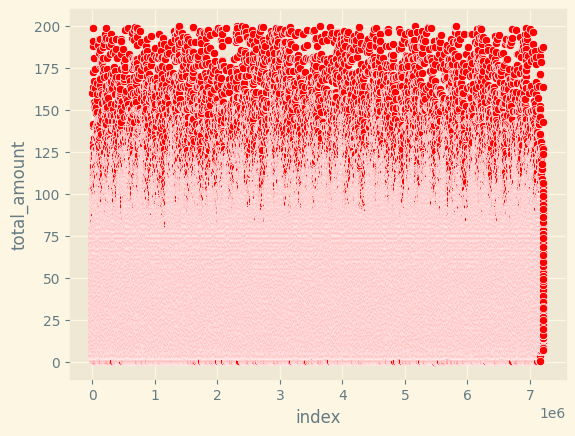

In [17]:
df1 = taxi_data[(taxi_data['total_amount'] < 200) & (taxi_data['total_amount'] > 0)].reset_index()
sns.scatterplot(data=df1, x='index', y='total_amount', color='red') 

<Axes: xlabel='index', ylabel='trip_distance'>

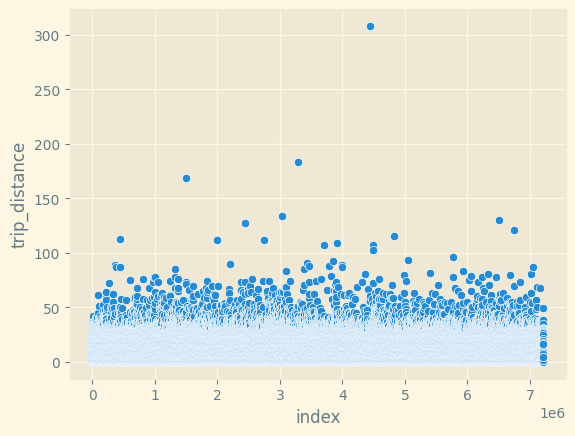

In [18]:
sns.scatterplot(data=df, x='index', y='trip_distance')

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [19]:
taxi_data.isnull().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          46723
trip_distance                0
PULocationID                 0
total_amount                 0
dtype: int64

In [20]:
taxi_data['passenger_count'].fillna('Not recorded', inplace=True)

C:\Users\sivam\AppData\Local\Temp\ipykernel_11292\1253769610.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not recorded' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_data['passenger_count'].fillna('Not recorded', inplace=True)


In [21]:
taxi_data['passenger_count'].value_counts()

passenger_count
1.0             5063866
2.0             1096061
3.0              296540
5.0              272184
6.0              159337
4.0              141524
0.0              137577
Not recorded      46723
7.0                  38
8.0                  25
9.0                  16
Name: count, dtype: int64

In [22]:
taxi_data.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
PULocationID             0
total_amount             0
dtype: int64

In [23]:
taxi_data = taxi_data[(taxi_data['total_amount'] < 200) & (taxi_data['total_amount'] > 0)] #removed outliers
print(taxi_data.shape)
taxi_data.head()

(7192475, 6)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,total_amount
0,2019-10-01 00:19:55,2019-10-01 00:23:57,1.0,0.4,48,8.3
1,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.3,144,20.3
2,2019-10-01 00:06:52,2019-10-01 00:21:23,1.0,5.0,137,26.0
4,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.0,25,3.8
5,2019-10-01 00:20:15,2019-10-01 00:20:29,1.0,0.0,193,3.8


In [24]:
taxi_data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                  object
trip_distance                   float64
PULocationID                      int64
total_amount                    float64
dtype: object

In [25]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])
taxi_data['PULocationID'] = taxi_data['PULocationID'].astype('str') 

In [26]:
taxi_data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                  object
trip_distance                   float64
PULocationID                     object
total_amount                    float64
dtype: object

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [27]:
taxi_data['transaction_year'] = taxi_data['tpep_pickup_datetime'].dt.year
taxi_data['transaction_month'] = taxi_data['tpep_pickup_datetime'].dt.month
taxi_data['transaction_day'] = taxi_data['tpep_pickup_datetime'].dt.day
taxi_data['transaction_hour'] = taxi_data['tpep_pickup_datetime'].dt.hour
taxi_data['transaction_date'] = taxi_data['tpep_pickup_datetime'].dt.date

In [28]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,total_amount,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_date
0,2019-10-01 00:19:55,2019-10-01 00:23:57,1.0,0.4,48,8.3,2019,10,1,0,2019-10-01
1,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.3,144,20.3,2019,10,1,0,2019-10-01
2,2019-10-01 00:06:52,2019-10-01 00:21:23,1.0,5.0,137,26.0,2019,10,1,0,2019-10-01
4,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.0,25,3.8,2019,10,1,0,2019-10-01
5,2019-10-01 00:20:15,2019-10-01 00:20:29,1.0,0.0,193,3.8,2019,10,1,0,2019-10-01


In [29]:
taxi_data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                  object
trip_distance                   float64
PULocationID                     object
total_amount                    float64
transaction_year                  int32
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
transaction_date                 object
dtype: object

In [30]:
taxi_data = taxi_data[(taxi_data['transaction_year'] == 2019) & (taxi_data['transaction_month'] == 10)]

In [31]:
categorical_features = ['PULocationID', 'transaction_date', 'transaction_year', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_features = ['trip_distance', 'total_amount']
main_taxi_data = taxi_data[categorical_features + numerical_features]

In [32]:
taxi_data_by_region = main_taxi_data.groupby(categorical_features).mean().reset_index()
taxi_data_by_region.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1,2019-10-01,2019,10,1,3,0.0,34.30
1,1,2019-10-01,2019,10,1,7,0.0,113.30
2,1,2019-10-01,2019,10,1,9,0.0,52.80
3,1,2019-10-01,2019,10,1,11,0.0,120.36
4,1,2019-10-01,2019,10,1,12,0.0,86.24


<Axes: >

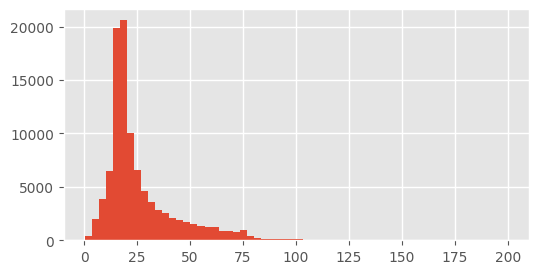

In [33]:
plt.style.use('ggplot')
taxi_data_by_region['total_amount'].hist(bins=60, figsize=(6,3))

<Axes: >

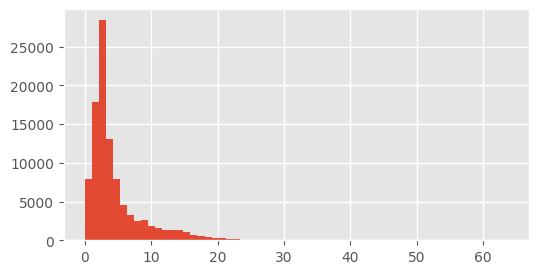

In [34]:
taxi_data_by_region['trip_distance'].hist(bins=60, figsize=(6,3))

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

In [35]:
benchmark_data = taxi_data_by_region.copy()

In [36]:
benchmark_data.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1,2019-10-01,2019,10,1,3,0.0,34.30
1,1,2019-10-01,2019,10,1,7,0.0,113.30
2,1,2019-10-01,2019,10,1,9,0.0,52.80
3,1,2019-10-01,2019,10,1,11,0.0,120.36
4,1,2019-10-01,2019,10,1,12,0.0,86.24


In [37]:
input_features = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour', 'trip_distance']
target_feature = ['total_amount']

## 5.1. Train-test split <a id='train_test_split'></a>

In [38]:
from sklearn.model_selection import train_test_split
X_bench = benchmark_data[input_features]
y_bench = benchmark_data[target_feature]

X_bench = pd.get_dummies(X_bench)

X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, train_size=0.7, random_state=42) 

## 5.2. Fitting model to the data <a id='fit_model'></a>

In [39]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor(max_depth=10)

bench_model = d_tree.fit(X_train, y_train)
y_pred = bench_model.predict(X_test)

## 5.3. Model evaluation <a id='model_evaluation'></a>

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print('RMS ERROR:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2 value:', r2_score(y_test, y_pred))

Mean Absolute Error: 4.949883097909216
Mean Squared Error: 88.21289336170469
RMS ERROR: 9.392171919300917
R2 value: 0.7226562829770273


In [41]:
actual_vals = y_test.to_numpy().reshape(-1,)
predicted_vals = y_pred
data = pd.DataFrame({'actual_values':actual_vals, 'predicted_values':predicted_vals})
data

,actual_values,predicted_values
0,23.191014,21.273968
1,43.639688,42.028977
2,40.300000,51.243771
3,17.511717,17.586666
4,19.900000,12.212125
...,...,...
29922,10.800000,17.586666
29923,17.555073,17.586666
29924,21.761250,18.892606
29925,28.485556,24.114680


<Axes: xlabel='actual_values', ylabel='predicted_values'>

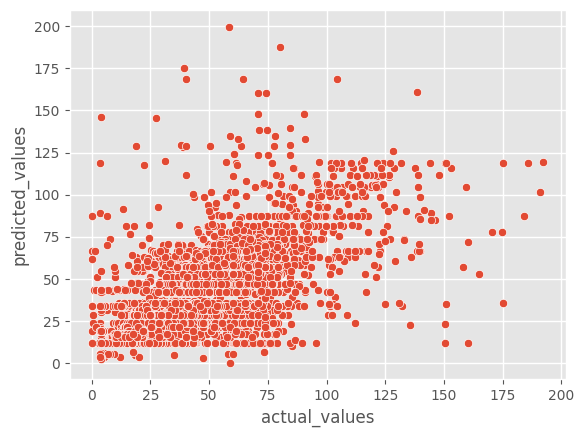

In [42]:
sns.scatterplot(data=data, x='actual_values', y='predicted_values')

## 5.4. Fixing problems <a id='fix_problems'></a>

In [43]:
input_features = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
target_feature = ['total_amount']

In [44]:
X_bench = benchmark_data[input_features]
y_bench = benchmark_data[target_feature]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

X_train = pd.get_dummies(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, train_size=0.7, random_state=42)

d_tree = DecisionTreeRegressor(max_depth=10)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

print("Mean absolute error value:",mean_absolute_error(y_test, y_pred))
print("Mean squared error value:",mean_squared_error(y_test, y_pred))
print("Root Mean squared error value:",sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score value:",r2_score(y_test, y_pred))

Mean absolute error value: 9.024157544058081
Mean squared error value: 199.39203225703747
Root Mean squared error value: 14.120624357904202
r2_score value: 0.37310607028633824


<Axes: xlabel='actual_values', ylabel='predicted_values'>

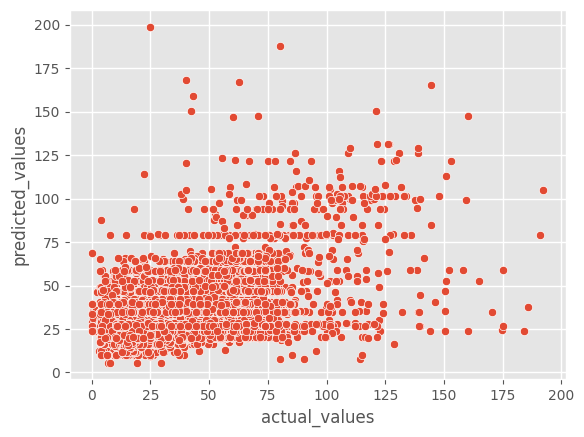

In [46]:
actual_vals = y_test.to_numpy().reshape(-1,)
data = pd.DataFrame({'actual_values':actual_vals, 'predicted_values':y_pred})
sns.scatterplot(data=data, x='actual_values', y='predicted_values')

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [47]:
taxi_data_by_region.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1,2019-10-01,2019,10,1,3,0.0,34.30
1,1,2019-10-01,2019,10,1,7,0.0,113.30
2,1,2019-10-01,2019,10,1,9,0.0,52.80
3,1,2019-10-01,2019,10,1,11,0.0,120.36
4,1,2019-10-01,2019,10,1,12,0.0,86.24


#### Extracting features from the existing data

In [48]:
data_with_new_features = taxi_data_by_region.copy()

In [49]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1,2019-10-01,2019,10,1,3,0.0,34.30
1,1,2019-10-01,2019,10,1,7,0.0,113.30
2,1,2019-10-01,2019,10,1,9,0.0,52.80
3,1,2019-10-01,2019,10,1,11,0.0,120.36
4,1,2019-10-01,2019,10,1,12,0.0,86.24


In [50]:
data_with_new_features.dtypes

PULocationID          object
transaction_date      object
transaction_year       int32
transaction_month      int32
transaction_day        int32
transaction_hour       int32
trip_distance        float64
total_amount         float64
dtype: object

In [51]:
data_with_new_features['transaction_date'] = pd.to_datetime(data_with_new_features['transaction_date'])
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday

In [52]:
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [53]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2020',
                        end='2023').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [54]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transaction_week_day,weekend,is_holiday
0,1,2019-10-01,2019,10,1,3,0.0,34.30,1,False,False
1,1,2019-10-01,2019,10,1,7,0.0,113.30,1,False,False
2,1,2019-10-01,2019,10,1,9,0.0,52.80,1,False,False
3,1,2019-10-01,2019,10,1,11,0.0,120.36,1,False,False
4,1,2019-10-01,2019,10,1,12,0.0,86.24,1,False,False


#### Gathering borough information

In [55]:
borough_df = pd.read_csv("Data/taxi_zone_lookup.csv")
borough_df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [56]:
borough_df = borough_df[['LocationID', 'Borough']]
borough_df.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [57]:
borough_df.isnull().sum()

LocationID    0
Borough       0
dtype: int64

In [58]:
borough_df.dtypes

LocationID     int64
Borough       object
dtype: object

In [59]:
borough_df['LocationID'] = borough_df['LocationID'].astype('str')
borough_df.dtypes

LocationID    object
Borough       object
dtype: object

In [60]:
data_with_new_features = data_with_new_features.merge(borough_df, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transaction_week_day,weekend,is_holiday,LocationID,Borough
0,1,2019-10-01,2019,10,1,3,0.0,34.30,1,False,False,1,EWR
1,1,2019-10-01,2019,10,1,7,0.0,113.30,1,False,False,1,EWR
2,1,2019-10-01,2019,10,1,9,0.0,52.80,1,False,False,1,EWR
3,1,2019-10-01,2019,10,1,11,0.0,120.36,1,False,False,1,EWR
4,1,2019-10-01,2019,10,1,12,0.0,86.24,1,False,False,1,EWR


In [61]:
data_with_new_features.drop(['LocationID'],axis=1, inplace=True)

In [62]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-10-01,2019,10,1,3,0.0,34.30,1,False,False,EWR
1,1,2019-10-01,2019,10,1,7,0.0,113.30,1,False,False,EWR
2,1,2019-10-01,2019,10,1,9,0.0,52.80,1,False,False,EWR
3,1,2019-10-01,2019,10,1,11,0.0,120.36,1,False,False,EWR
4,1,2019-10-01,2019,10,1,12,0.0,86.24,1,False,False,EWR


In [63]:
data_with_new_features.Borough.value_counts()

Borough
Manhattan        45126
Brooklyn         22343
Queens           22028
Bronx             8124
Unknown           1442
EWR                405
Staten Island      287
Name: count, dtype: int64

In [64]:
#Removed the boroughs with very less taxi info
data_with_new_features = data_with_new_features.loc[data_with_new_features['Borough'].isin(['Manhattan','Brooklyn','Queens','Bronx'])] 

In [65]:
data_with_new_features.shape

(97621, 12)

#### Importing weather data of NY city

In [66]:
weather_df = pd.read_csv('Data/nyc_weather.csv')
weather_df.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [67]:
weather_df.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [68]:
weather_df['date and time'] = pd.to_datetime(weather_df['date and time'])

C:\Users\sivam\AppData\Local\Temp\ipykernel_11292\3912539793.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  weather_df['date and time'] = pd.to_datetime(weather_df['date and time'])


In [69]:
weather_df.isnull().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [70]:
weather_df.loc[weather_df['cloud cover'].isnull()]

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
140,2019-12-14 10:00:00,10.6,96,0,NaN,1
141,2019-12-14 07:00:00,9.4,97,2,NaN,22
1925,2019-05-05 02:00:00,12.2,100,2,NaN,0.5
2512,2019-02-20 13:00:00,-3.3,88,0,NaN,1


In [71]:
weather_df['cloud cover'].value_counts()

cloud cover
70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: count, dtype: int64

In [72]:
weather_df['cloud cover'] = weather_df['cloud cover'].replace('70 – 80%.',.7)
weather_df['cloud cover'] = weather_df['cloud cover'].replace('100%.', 1)
weather_df['cloud cover'] = weather_df['cloud cover'].replace('20–30%.',.25)
weather_df['cloud cover'] = weather_df['cloud cover'].replace('50%.', 5)
weather_df['cloud cover'] = weather_df['cloud cover'].replace('no clouds', 0)
weather_df['cloud cover'] = weather_df['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
weather_df['cloud cover'] = weather_df['cloud cover'].astype('float')
weather_df.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.3
1,2019-12-31 19:00:00,6.7,71,5,0.7,NaN
2,2019-12-31 16:00:00,7.2,66,5,5.0,NaN
3,2019-12-31 13:00:00,6.1,76,3,1.0,Trace of precipitation
4,2019-12-31 10:00:00,4.4,83,2,1.0,Trace of precipitation


In [73]:
weather_df['cloud cover'] = weather_df['cloud cover'].interpolate()

In [74]:
weather_df['amount of precipitation'].value_counts()

amount of precipitation
Trace of precipitation    266
0.3                        61
2                          49
1                          45
0.5                        42
0.8                        42
4                          33
5                          24
3                          23
6                          19
7                          13
8                          13
9                          11
10                         10
13                          7
12                          7
15                          6
11                          5
16                          3
22                          2
14                          2
29                          2
63                          1
21                          1
68                          1
17                          1
20                          1
30                          1
35                          1
34                          1
24                          1
18                          1
25              

In [75]:
weather_df['amount of precipitation'].isnull().sum()

2240

In [76]:
weather_df['amount of precipitation'] = weather_df['amount of precipitation'].replace('Trace of precipitation', 0.01)
weather_df['amount of precipitation'] = weather_df['amount of precipitation'].astype('float')
weather_df['amount of precipitation'] = weather_df['amount of precipitation'].interpolate()

In [77]:
weather_df.isnull().sum()

date and time              0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [78]:
weather_df.dtypes

date and time              datetime64[ns]
temperature                       float64
humidity                            int64
wind speed                          int64
cloud cover                       float64
amount of precipitation           float64
dtype: object

In [79]:
weather_df.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.203333
2,2019-12-31 16:00:00,7.2,66,5,5.0,0.106667
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.010000
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.010000


In [80]:
weather_df['date and time'] = pd.to_datetime(weather_df['date and time'])
weather_df['date'] = weather_df['date and time'].dt.date
weather_df['hour'] = weather_df['date and time'].dt.hour
weather_df['month'] = weather_df['date and time'].dt.month
weather_df['day'] = weather_df['date and time'].dt.day
weather_df.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,date,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,2019-12-31,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.203333,2019-12-31,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,5.0,0.106667,2019-12-31,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.010000,2019-12-31,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.010000,2019-12-31,10,12,31


In [81]:
weather_df.dtypes

date and time              datetime64[ns]
temperature                       float64
humidity                            int64
wind speed                          int64
cloud cover                       float64
amount of precipitation           float64
date                               object
hour                                int32
month                               int32
day                                 int32
dtype: object

In [82]:
data_with_new_features['transaction_month'] = data_with_new_features['transaction_month'].astype('int32')
data_with_new_features.dtypes

PULocationID                    object
transaction_date        datetime64[ns]
transaction_year                 int32
transaction_month                int32
transaction_day                  int32
transaction_hour                 int32
trip_distance                  float64
total_amount                   float64
transaction_week_day             int32
weekend                           bool
is_holiday                        bool
Borough                         object
dtype: object

In [83]:
data_for_model = data_with_new_features.merge(weather_df, left_on=['transaction_month', 'transaction_day', 'transaction_hour'] , right_on=['month', 'day', 'hour'], how='left')
data_for_model

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transaction_week_day,weekend,...,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,date,hour,month,day
0,10,2019-10-01,2019,10,1,0,0.000,52.800,1,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,2019-10-01,2019,10,1,2,14.130,73.700,1,False,...,2019-10-01 02:00:00,17.8,73.0,4.0,1.0,0.01,2019-10-01,2.0,10.0,1.0
2,10,2019-10-01,2019,10,1,4,20.030,62.420,1,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,2019-10-01,2019,10,1,5,17.255,67.485,1,False,...,2019-10-01 05:00:00,18.3,68.0,4.0,1.0,0.01,2019-10-01,5.0,10.0,1.0
4,10,2019-10-01,2019,10,1,6,14.690,66.274,1,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97616,98,2019-10-31,2019,10,31,6,0.000,46.120,3,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97617,98,2019-10-31,2019,10,31,8,12.450,54.600,3,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97618,98,2019-10-31,2019,10,31,11,0.000,40.120,3,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97619,98,2019-10-31,2019,10,31,12,0.910,5.800,3,False,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data_for_model = data_for_model.drop(['date and time', 'date', 'hour','month','day'], axis=1)

In [85]:
data_for_model.isnull().sum()

PULocationID                   0
transaction_date               0
transaction_year               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                        0
temperature                65124
humidity                   65124
wind speed                 65124
cloud cover                65124
amount of precipitation    65124
dtype: int64

In [86]:
data_for_model = data_for_model.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [87]:
data_for_model = data_for_model.interpolate()
data_for_model.isna().sum()

C:\Users\sivam\AppData\Local\Temp\ipykernel_11292\2521348271.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_for_model = data_for_model.interpolate()


PULocationID                 0
transaction_date             0
transaction_year             0
transaction_month            0
transaction_day              0
transaction_hour             0
trip_distance                0
total_amount                 0
transaction_week_day         0
weekend                      0
is_holiday                   0
Borough                      0
temperature                202
humidity                   202
wind speed                 202
cloud cover                202
amount of precipitation    202
dtype: int64

In [88]:
data_for_model = data_for_model.ffill()
data_for_model = data_for_model.bfill()
data_for_model.isnull().sum()

PULocationID               0
transaction_date           0
transaction_year           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [89]:
weather_df.groupby('date and time').temperature.value_counts()

date and time        temperature
2019-01-01 01:00:00  8.3            1
2019-01-01 04:00:00  12.2           1
2019-01-01 07:00:00  14.4           1
2019-01-01 10:00:00  15.6           1
2019-01-01 13:00:00  12.2           1
                                   ..
2019-12-31 10:00:00  4.4            1
2019-12-31 13:00:00  6.1            1
2019-12-31 16:00:00  7.2            1
2019-12-31 19:00:00  6.7            1
2019-12-31 22:00:00  6.1            1
Name: count, Length: 2936, dtype: int64

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [90]:
data_for_model.head()

,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-10-01,2019,10,1,0,0.000000,52.800000,1,False,False,Queens,17.8,73.0,4.0,1.0,0.01
1,100,2019-10-01,2019,10,1,0,3.183043,19.055507,1,False,False,Manhattan,17.8,73.0,4.0,1.0,0.01
2,107,2019-10-01,2019,10,1,0,2.543774,15.752642,1,False,False,Manhattan,17.8,73.0,4.0,1.0,0.01
3,112,2019-10-01,2019,10,1,0,2.642000,13.422000,1,False,False,Brooklyn,17.8,73.0,4.0,1.0,0.01
4,113,2019-10-01,2019,10,1,0,3.476471,18.751176,1,False,False,Manhattan,17.8,73.0,4.0,1.0,0.01


In [91]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'total_amount'

In [92]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42) 

## 7.1. Decision tree Regressor<a id='decision_tree'></a>

In [122]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor(max_depth=10)

model = d_tree.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [123]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print('RMS ERROR:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2 value:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.37930535002098
Mean Squared Error: 178.0990366418753
RMS ERROR: 13.345375103078792
R2 value: 0.3343654725878281


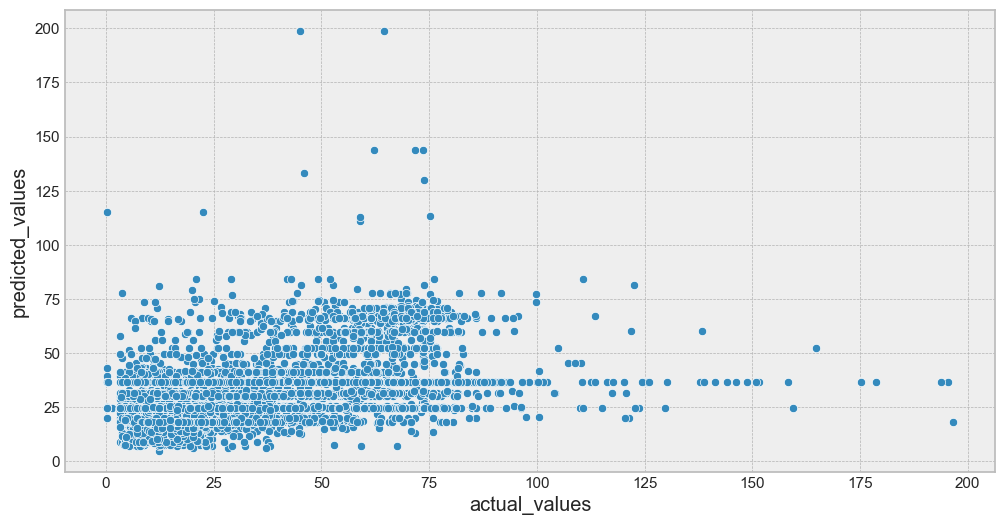

In [124]:
plt.style.use('bmh')
actual_vals = y_test.to_numpy().reshape(-1,)
data = pd.DataFrame({'actual_values':actual_vals, 'predicted_values':y_pred})
sns.scatterplot(data=data, x='actual_values', y='predicted_values')
sns.set(rc = {'figure.figsize':(12,6)})

### Overfit

In [96]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [97]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [98]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.458725e+01,14.512997
1,5,1.376867e+01,13.799498
2,8,1.314774e+01,13.444999
3,10,1.271338e+01,13.306158
4,15,1.156433e+01,13.496631
5,20,1.044607e+01,13.736527
6,30,8.482346e+00,14.527677
7,50,4.445855e+00,15.938690
8,70,1.057946e+00,16.578831
9,100,1.398939e-16,16.616662


Text(0, 0.5, 'root mean squared error')

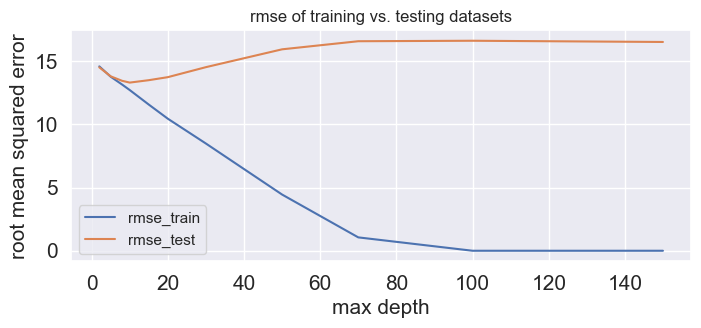

In [99]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(8,3),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

### Underfit

In [100]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [101]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)


decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 10.61637103412544
mean_squared_error 231.28383122560805
root_mean_squared_error 15.208018648910452
r2 0.13682574453294827


In [102]:
# Testing performance
y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 10.569264627094242
mean_squared_error 227.50493906322
root_mean_squared_error 15.083266856461169
r2 0.14971385891440903


## 7.2. Random forest Regressor <a id='random_forest'></a>

In [125]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=10)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [126]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print('RMS ERROR:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2 value:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.211941740156252
Mean Squared Error: 167.75447260299964
RMS ERROR: 12.952006508761476
R2 value: 0.3730276637211122


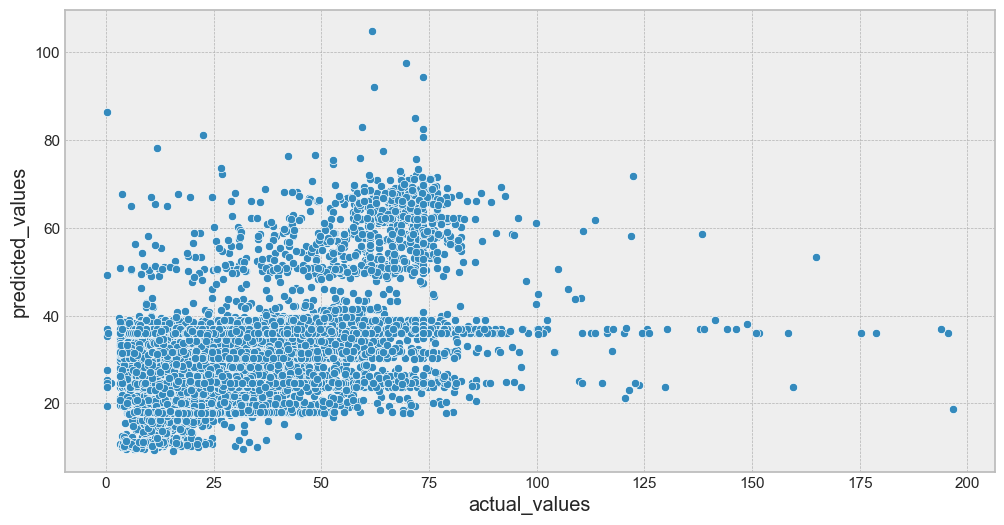

In [127]:
plt.style.use('bmh')
actual_vals = y_test.to_numpy().reshape(-1,)
data = pd.DataFrame({'actual_values':actual_vals, 'predicted_values':y_pred})
sns.scatterplot(data=data, x='actual_values', y='predicted_values')
sns.set(rc = {'figure.figsize':(12,6)})

## 7.3. Gradient Boosting Regressor <a id='gradient_boosting'></a>

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

In [129]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print('RMS ERROR:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2 value:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.315629691709969
Mean Squared Error: 161.8074681296396
RMS ERROR: 12.720356446642507
R2 value: 0.3952542382539266


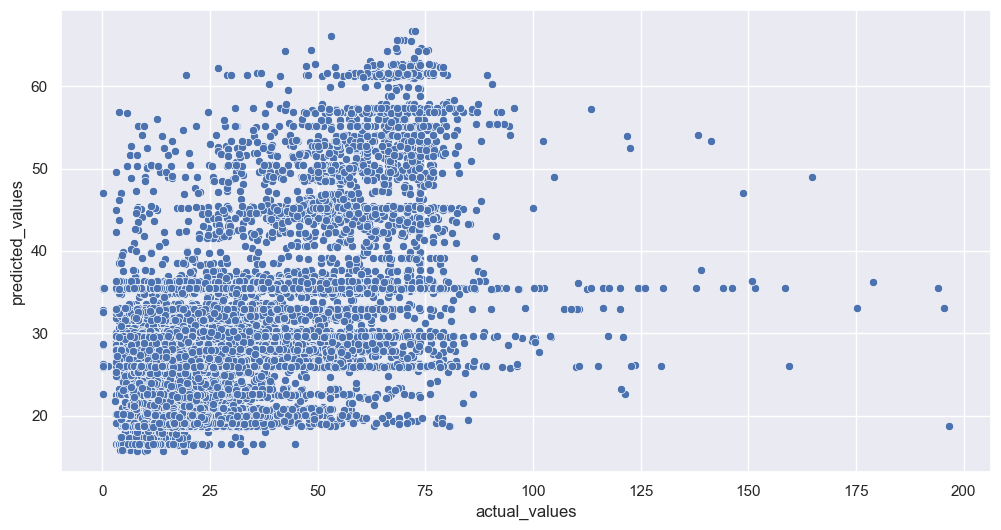

In [130]:
actual_vals = y_test.to_numpy().reshape(-1,)
data = pd.DataFrame({'actual_values':actual_vals, 'predicted_values':y_pred})
sns.scatterplot(data=data, x='actual_values', y='predicted_values')
sns.set(rc = {'figure.figsize':(12,6)})

<Axes: >

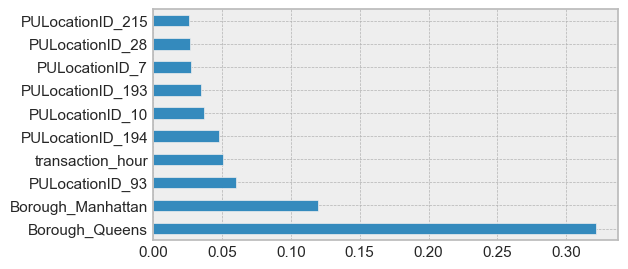

In [109]:
plt.style.use('bmh')
plt.figure(figsize=(6,3))
(pd.Series(gb_model.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

| Algorithm         |  MAE  |  RMSE  |   R2   |
|-------------------|:-----:|:------:|:------:|
| Benchmark model   | 9.024 | 14.121 | 0.373 |
| Decision tree     | 8.379 | 13.345 | 0.334 |
| Random forest     | 8.211 | 12.952 | 0.373 |
| Gradient boosting | 8.315 | 12.721 | 0.395 |

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)

## 8.1. Finding best parameters <a id='find_best_parameters'></a>

In [110]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1500, num = 7)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,75,200,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [111]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 75, 200, 500, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 416, 633, 850, 1066, 1283, 1500]}


In [112]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=rf,
                             param_distributions=random_grid,
                             n_iter=10,
                             cv=3,  
                             n_jobs=-1,
                             verbose=2,
                            random_state=42,
                            error_score='raise')

rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [113]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,683.383723,3.223162,38.547889,0.830238,850,20,1,log2,None,False,"{'n_estimators': 850, 'min_samples_split': 20,...",0.476190,0.461873,0.461673,0.466579,0.006797,3
1,436.285336,23.593518,57.513242,21.177233,1500,10,20,log2,200,True,"{'n_estimators': 1500, 'min_samples_split': 10...",0.385139,0.375489,0.377143,0.379257,0.004213,10
2,926.754366,22.640075,44.183007,0.928216,1500,40,2,sqrt,500,True,"{'n_estimators': 1500, 'min_samples_split': 40...",0.476898,0.462597,0.464087,0.467861,0.006419,1
3,391.651751,4.612735,24.197574,0.277363,850,5,4,log2,500,True,"{'n_estimators': 850, 'min_samples_split': 5, ...",0.439230,0.426530,0.426128,0.430629,0.006084,8
4,510.678613,4.173924,28.925634,0.417713,850,5,2,log2,500,True,"{'n_estimators': 850, 'min_samples_split': 5, ...",0.457208,0.442612,0.442008,0.447276,0.007028,7
5,950.141583,6.215213,32.531306,0.056174,1283,5,10,sqrt,500,False,"{'n_estimators': 1283, 'min_samples_split': 5,...",0.463243,0.450969,0.452091,0.455434,0.005540,5
6,121.237867,0.511310,5.822793,0.161862,200,40,2,sqrt,None,True,"{'n_estimators': 200, 'min_samples_split': 40,...",0.476169,0.461355,0.463508,0.467011,0.006535,2
7,844.580033,11.736563,40.681148,2.127616,1500,40,2,log2,75,False,"{'n_estimators': 1500, 'min_samples_split': 40...",0.462380,0.446963,0.450062,0.453135,0.006658,6
8,351.511898,5.226927,22.486634,1.146215,1066,5,10,log2,75,True,"{'n_estimators': 1066, 'min_samples_split': 5,...",0.404848,0.395437,0.399058,0.399781,0.003876,9
9,1226.226126,12.127955,67.257507,6.559848,1500,5,1,sqrt,500,True,"{'n_estimators': 1500, 'min_samples_split': 5,...",0.473753,0.459482,0.457750,0.463662,0.007170,4


In [116]:
rf_random.best_params_

{'n_estimators': 1500,
 'min_samples_split': 40,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 500,
 'bootstrap': True}

In [131]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators = 1500,
                             min_samples_split = 40,
                            min_samples_leaf = 2,
                            max_features = 'sqrt',
                            max_depth = 500,
                            bootstrap = True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  942.816653251648  seconds
mean_absolute_error 7.15276903977709
mean_squared_error 140.87981007865275
root_mean_squared_error 11.869280099426955
r2 0.47347011206925327


In [132]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators = 200,
                             min_samples_split = 40,
                            min_samples_leaf = 2,
                            max_features = 'sqrt',
                            max_depth = None,
                            bootstrap = True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  129.23132371902466  seconds
mean_absolute_error 7.156491522648952
mean_squared_error 140.9228220040963
root_mean_squared_error 11.871091862339213
r2 0.47330935756319004


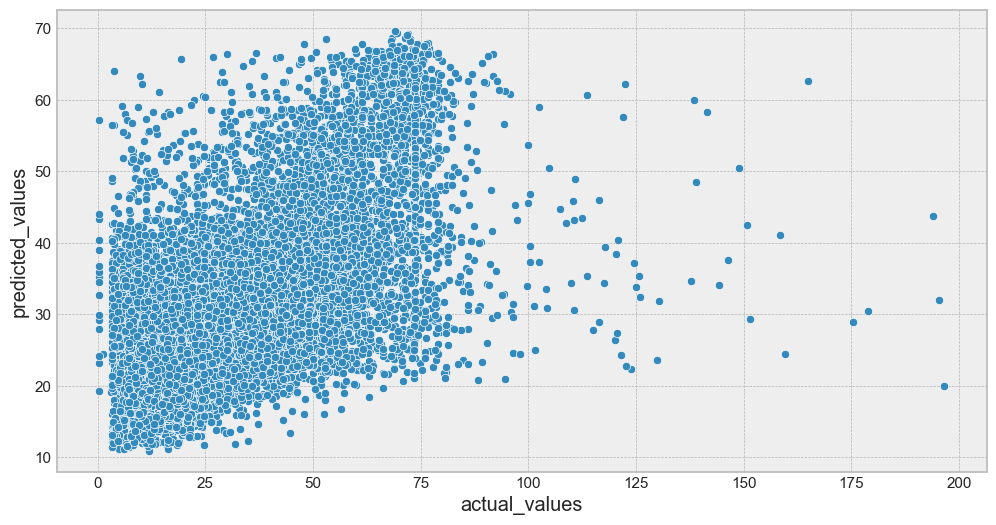

In [134]:
plt.style.use('bmh')
actual_vals = y_test.to_numpy().reshape(-1,)
data = pd.DataFrame({'actual_values':actual_vals, 'predicted_values':y_pred})
sns.scatterplot(data=data, x='actual_values', y='predicted_values')
sns.set(rc = {'figure.figsize':(12,6)})